# Determining severity of Accident . Coursera Capstone Project



Context : This project will use a dataset containing accident data from Seattle city.The data determines the accident severity . There are a total of 37 data attributes and 194674 rows.Not all attributes are useful and hence some attributes will not be used . The dataset can be found at https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

Descriptors for dataset attributes can be found at https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

Data:  We will use the Coursera Capstone Collision data to make the analysis (https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv) . The weather light & road conditions data will be used to predict the severity of the collision . This will be also accompanied by other criterion like location of accident , type of vehicles involved to predict the severity of collision 
#For example an assumption could be that Raining with  Wet road conditions ,  Dark lighting conditions /No Street Lights could increase severity of collision . Attributes like driver attention , influence of alcohol & drugs will also contribute to the severity of collision. All these parameters will contribute to the machine learning model. We will also conduct some statistical analysis to see parameters which have high correlation with the accident severity


In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import itertools
import sklearn
import matplotlib.ticker as ticker

from sklearn import metrics
from matplotlib.ticker import NullFormatter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [14]:
df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv",low_memory=False)

In [15]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [17]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


# Methodology:
We will check the columns which have missing values. Based on that we will take some decisions on removal of those columns incase some of them have large number of missing values
Step 1 : Arrive at columnwise sum of missing values

In [19]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

Step 2 : Note we see that columns have large number of missing values. We should remove these columns. There are also columns containing key values which are not intuitive and hence will be removed. Certain fields contain long descriptions we will remove those columns as well.

In [22]:
df1=df.drop(columns=['OBJECTID','UNDERINFL','SEVERITYCODE.1','STATUS','REPORTNO', 'X','Y','INCKEY','COLDETKEY','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','INATTENTIONIND','PEDROWNOTGRNT','SPEEDING'])

Step 3 : Now we will remove rows that contain missing values

In [23]:
df2=df1.dropna()

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187504 entries, 0 to 194672
Data columns (total 14 columns):
SEVERITYCODE     187504 non-null int64
ADDRTYPE         187504 non-null object
COLLISIONTYPE    187504 non-null object
PERSONCOUNT      187504 non-null int64
PEDCOUNT         187504 non-null int64
PEDCYLCOUNT      187504 non-null int64
VEHCOUNT         187504 non-null int64
INCDATE          187504 non-null object
INCDTTM          187504 non-null object
WEATHER          187504 non-null object
ROADCOND         187504 non-null object
LIGHTCOND        187504 non-null object
ST_COLCODE       187504 non-null object
HITPARKEDCAR     187504 non-null object
dtypes: int64(5), object(9)
memory usage: 21.5+ MB


Step 4 :Check if any of the columns contain missing values

In [25]:
df2.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDATE          0
INCDTTM          0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
HITPARKEDCAR     0
dtype: int64

In [26]:
df2.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight,10,N
1,1,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On,11,N
2,1,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight,32,N
3,1,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Clear,Dry,Daylight,23,N
4,2,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,Raining,Wet,Daylight,10,N


Carry out encoding from object -> Category-> Numerical values

In [27]:
# Copy dataframe
df3=df2[:]
# Change datatype from object to category
df3["ADDRTYPE"] = df3["ADDRTYPE"].astype('category')
df3["COLLISIONTYPE"] = df3["COLLISIONTYPE"].astype('category')
df3["WEATHER"] = df3["WEATHER"].astype('category')
df3["ROADCOND"] = df3["ROADCOND"].astype('category')
df3["LIGHTCOND"] = df3["LIGHTCOND"].astype('category')
df3["ST_COLCODE"] = df3["ST_COLCODE"].astype('category')
df3["HITPARKEDCAR"] = df3["HITPARKEDCAR"].astype('category')

In [28]:
# Create numerical representation for categories
df3["ADDRTYPE"] = df3["ADDRTYPE"].cat.codes
df3["COLLISIONTYPE"] = df3["COLLISIONTYPE"].cat.codes
df3["WEATHER"] = df3["WEATHER"].cat.codes
df3["ROADCOND"] = df3["ROADCOND"].cat.codes
df3["LIGHTCOND"] = df3["LIGHTCOND"].cat.codes
df3["ST_COLCODE"] = df3["ST_COLCODE"].cat.codes
df3["HITPARKEDCAR"] = df3["HITPARKEDCAR"].cat.codes

In [29]:
df3.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,2,0,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,4,8,5,2,0
1,1,1,9,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,6,8,2,3,0
2,1,1,5,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,4,0,5,26,0
3,1,1,4,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,1,0,5,16,0
4,2,2,0,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,6,8,5,2,0


In [30]:
# Prepare correlation matrix between attributes
df3.corr()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
SEVERITYCODE,1.000000,0.199718,-0.128341,0.128368,0.247915,0.215361,-0.081014,-0.105479,-0.045903,-0.055773,-0.148922,-0.100308
ADDRTYPE,0.199718,1.000000,-0.473026,0.066913,0.143146,0.084652,-0.084917,-0.086782,-0.028255,-0.047774,-0.230558,-0.124149
COLLISIONTYPE,-0.128341,-0.473026,1.000000,0.014110,0.092992,-0.213844,0.105357,0.027525,-0.001363,0.030995,0.056175,0.035416
PERSONCOUNT,0.128368,0.066913,0.014110,1.000000,-0.026249,-0.041409,0.400479,-0.061690,-0.030057,-0.036942,-0.226652,-0.051616
PEDCOUNT,0.247915,0.143146,0.092992,-0.026249,1.000000,-0.018106,-0.316989,-0.011035,0.005950,-0.039330,-0.132112,-0.034985
PEDCYLCOUNT,0.215361,0.084652,-0.213844,-0.041409,-0.018106,1.000000,-0.306058,-0.053879,-0.050236,0.013396,0.237381,-0.029808
VEHCOUNT,-0.081014,-0.084917,0.105357,0.400479,-0.316989,-0.306058,1.000000,-0.009878,-0.016649,0.034604,-0.266461,0.069207
WEATHER,-0.105479,-0.086782,0.027525,-0.061690,-0.011035,-0.053879,-0.009878,1.000000,0.749440,0.201645,0.106486,0.057500
ROADCOND,-0.045903,-0.028255,-0.001363,-0.030057,0.005950,-0.050236,-0.016649,0.749440,1.000000,0.019298,0.041631,0.017946
LIGHTCOND,-0.055773,-0.047774,0.030995,-0.036942,-0.039330,0.013396,0.034604,0.201645,0.019298,1.000000,-0.014261,0.032848


# Exploratory Data Analysis : Execute next step of Exploratory data analysis

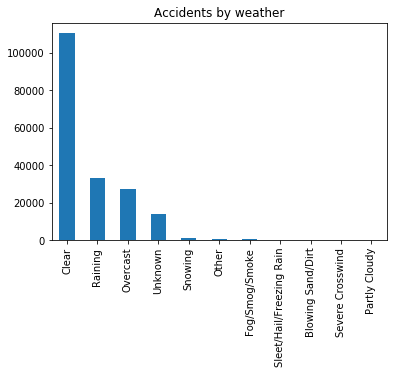

In [33]:
df2['WEATHER'].value_counts().plot(kind='bar')
plt.title('Accidents by weather')
plt.show()

Observation 1 : Accident frequency is higher on a clear day versus a rainy / overcast day
Now evaluate the accidents by condition of the road

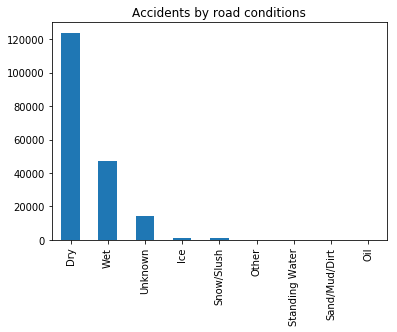

In [34]:
df2['ROADCOND'].value_counts().plot(kind='bar')
plt.title('Accidents by road conditions')
plt.show()

Observation 2 : Accidents frequency is higher on a dry day versus a wet day

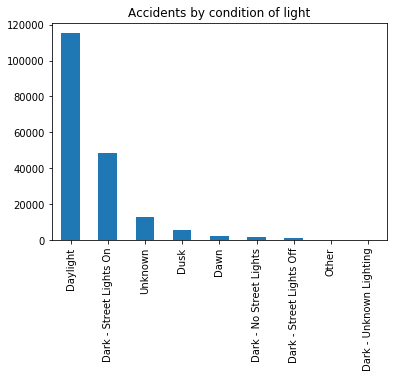

In [35]:
# Evaluation by condition of light 
df2['LIGHTCOND'].value_counts().plot(kind='bar')
plt.title('Accidents by condition of light')
plt.show()

Observation 3 : Accidents are occuring during daylight versus dark 

# Prepare Model

In [44]:
X= df3.drop(['SEVERITYCODE','INCDATE','INCDTTM'], axis=1)
X.head()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,0,2,0,0,2,4,8,5,2,0
1,1,9,2,0,0,2,6,8,2,3,0
2,1,5,4,0,0,3,4,0,5,26,0
3,1,4,3,0,0,3,1,0,5,16,0
4,2,0,2,0,0,2,6,8,5,2,0


In [45]:

Y= df3['SEVERITYCODE'].values
Y

array([2, 1, 1, ..., 2, 2, 1])

In [46]:
# Prepare test set(20%) and train set(80%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print('Shape' ,X_train.shape, y_train.shape)

Shape (150003, 11) (150003,)


In [47]:
# Knn Model
from sklearn.neighbors import KNeighborsClassifier
KNN_model= KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
yhat_knn = KNN_model.predict(X_test)
yhat_knn[:10]

array([2, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [50]:
from sklearn.tree import DecisionTreeClassifier
Tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
Tree_model.fit(X_train,y_train)
Tree_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
yhat_tree=Tree_model.predict(X_test)
yhat_tree[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [53]:

from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01,max_iter=1000).fit(X_train,y_train)
LR_model

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
yhat_lr=LR_model.predict(X_test)
yhat_lr[:5]

array([1, 1, 1, 1, 1])

In [62]:
knn_predictions= KNN_model.predict(X_test)
print ("KNN model F1-score:%.2f" % f1_score(y_test, knn_predictions, average='weighted'))
Tree_predictions= Tree_model.predict(X_test)
print ("Decision tree model F1-score:%.2f" % f1_score(y_test, Tree_predictions, average='weighted'))

KNN model F1-score:0.72
Decision tree model F1-score:0.71


In [61]:
LR_predictions= LR_model.predict(X_test)
LR_prob_predictions=LR_model.predict_proba(X_test)

print ("Logistic regression model F1-score:%.2f" % f1_score(y_test, LR_predictions, average='weighted'))
print('Logistic regression model LogLoss:%.2f'% log_loss(y_test,LR_prob_predictions))

Logistic regression model F1-score:0.70
Logistic regression model LogLoss:0.53


# Results : 
    KNN : F1 Score = 0.72
    Logistic Regression : F1 Score = 0.7 , LogLoss = 0.53
    DecisioN Tree : F1 - Score = 0.71
    The model shows accuracy more than 70%
    Exploratory data analysis shows that : 
    1. Accidents more frequent when road is dry versus other days
    2.higher frequency when there is day light
    3. Higher frequency when its a clear day

# Discussion Section
1. We can optimize further by completing the data for some of the missing values
2. Increase # of neighbours in KNeighbour to improve tuning and prediction


# Recommendations & Conclusion 
1.From the exploratory analysis we see that most accidents are happening when it is supposed to be least likely ie when weather , road conditions and day light is good. These inferences should be shared with drivers to reduce accidents.
Additionally the prediction model is fairly satisfactory which can help civic authorities and governments plan and communicate accordingly based on the inferences and use the models to prevent accidents.